In [26]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json
import pandas as pd
import matplotlib.pyplot as plt

#Variables that contains the user credentials to access Twitter API
access_token = "your_access_token"
access_token_secret = "your_access_token_secret"
consumer_key = "your_consumer_key"
consumer_secret = "your_consumer_secret"

tweets_data_path = 'Twitter/twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue



tweets = pd.DataFrame()


tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))

print(tweets)

                                                  text lang country
0    Hopin is hiring a remote Account Manager #remo...   en    None
1    Something to ponder, via Monty Python: "Half a...   en    None
2    RT @neatcurios: Vintage Art Deco Folk Art Plan...   en    None
3    @FlLIBUSTER So many more, Monty Python, Blacka...   en    None
4    RT @nbtechnologies2: #coding  #javascript #web...   en    None
..                                                 ...  ...     ...
380  RT @ArikpoUka: How R Still Excels Compared To ...   en    None
381  The Python Extension for #VSCode Insiders team...   en    None
382  RT @jcafesin: #NewYork, LIVE ONLINE, learn #SE...   en    None
383  RT @jcafesin: #NewYork, LIVE ONLINE, learn #SE...   en    None
384  How to Fix Render-Blocking JavaScript and CSS ...   en    None

[385 rows x 3 columns]


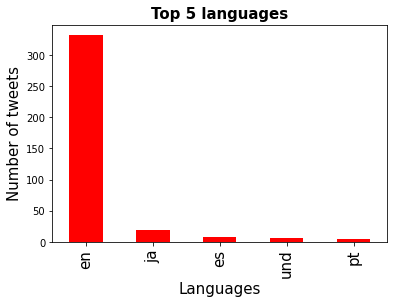

In [28]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [14]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [20]:
tweets['pubg'] = tweets['text'].apply(lambda tweet:word_in_text('pubg', tweet))
tweets['cycling'] = tweets['text'].apply(lambda tweet: word_in_text('cycling', tweet))
tweets['recipe'] = tweets['text'].apply(lambda tweet: word_in_text('recipe', tweet))

print (tweets['recipe'].value_counts()[True])

160
